### Задание №4. Итоговый проект

In [142]:
import numpy as np
import pandas as pd


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
df = pd.read_csv('kc_house_data.csv')
df.sample(n=10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7180,3275850190,20140905T000000,700000.0,3,2.50,2410,9916,2.0,0,0,...,10,2410,0,1989,0,98052,47.6911,-122.103,2310,8212
19993,6371000148,20141125T000000,439108.0,2,1.50,1130,1340,2.0,0,0,...,8,910,220,2008,0,98116,47.5761,-122.410,1310,1340
11677,923049468,20141110T000000,218000.0,3,1.00,980,12812,1.0,0,0,...,7,980,0,1956,0,98168,47.4892,-122.306,1430,8986
14740,3022079087,20140521T000000,712000.0,4,2.50,3400,247421,2.0,0,0,...,9,3400,0,2001,0,98010,47.3623,-121.971,3180,222156
11355,1370803510,20140515T000000,790000.0,3,1.75,1790,6117,1.0,0,2,...,8,1350,440,1940,0,98199,47.6366,-122.401,1960,5554
15840,7351200050,20141218T000000,1335000.0,4,1.75,2300,13342,1.5,1,4,...,7,2300,0,1934,1958,98125,47.7308,-122.282,2500,13342
3147,2770602265,20150224T000000,345000.0,3,2.00,1430,4200,1.0,0,0,...,7,830,600,1908,0,98199,47.6462,-122.384,1540,5000
16570,2923039243,20141113T000000,340000.0,4,1.00,1200,11834,1.0,1,3,...,6,1200,0,1972,0,98070,47.4557,-122.443,1670,47462
13999,1241500155,20140805T000000,575000.0,3,2.50,2070,3599,2.0,0,0,...,8,2070,0,1999,0,98033,47.6679,-122.165,2070,6844
4185,952007069,20150121T000000,393500.0,3,1.75,1230,1441,2.0,0,0,...,8,1010,220,2004,0,98116,47.5626,-122.382,1170,1942


#### Условие 1: Задача 1
##### Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы

Text(0.5, 1.0, 'Mean price by condition')

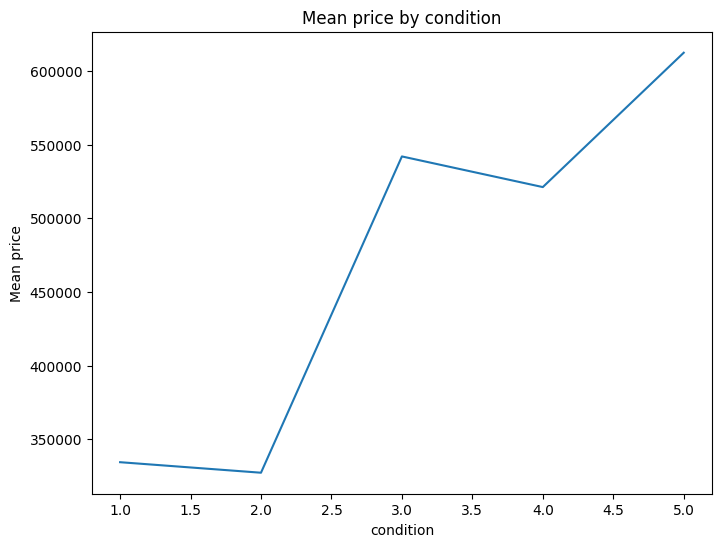

In [145]:
plt.figure(figsize=(8,6))
data = df.groupby('condition').agg({'price':['mean']})
plt.plot(data['price'])
plt.xlabel('condition')
plt.ylabel('Mean price')
plt.title('Mean price by condition')

##### Цена дома во многом зависит от его состояния. В среднем, цена возрастает, с ростом оценки состояния дома.

##### 1.2 Изучите стоимости недвижимости

Text(0.5, 1.0, 'Price hist')

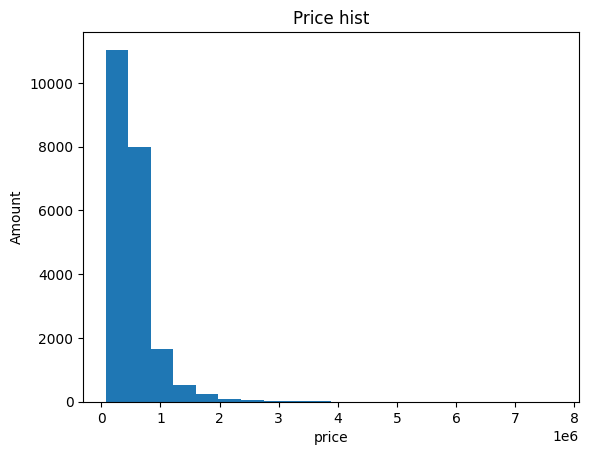

In [146]:
#plt.figure(figsize=(6,8))
plt.hist(df['price'],bins=20)
plt.xlabel('price')
plt.ylabel('Amount')
plt.title('Price hist')

Text(0.5, 1.0, 'Распределение цен на дома')

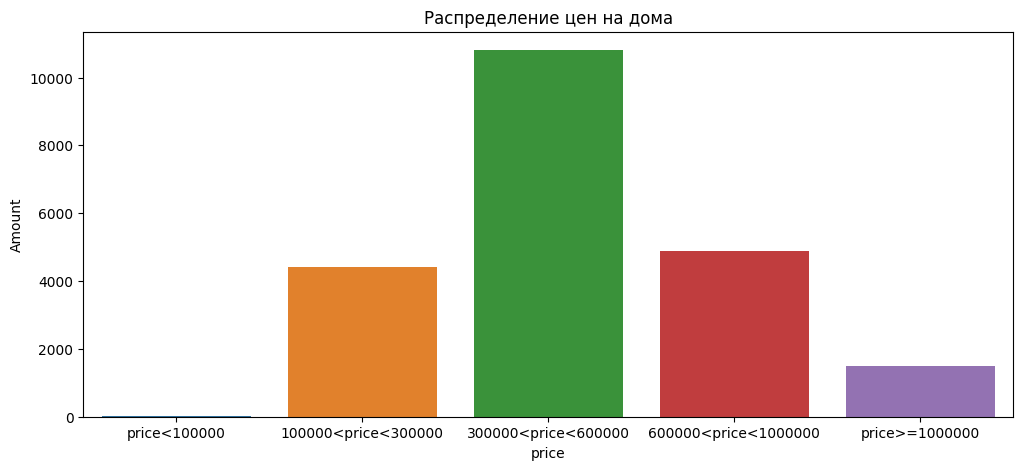

In [147]:
data = pd.Series({'amount':[df[(df['price']<100000) & (df['price']>0)]['price'].count(),
                  df[(df['price']<300000) & (df['price']>=100000)]['price'].count(),
                  df[(df['price']<600000) & (df['price']>=300000)]['price'].count(),
                  df[(df['price']<1000000) & (df['price']>=600000)]['price'].count(),
                  df[df['price']>=1000000]['price'].count()],'price':['price<100000','100000<price<300000',
                                                                      '300000<price<600000',
                                                                      '600000<price<1000000',
                                                                      'price>=1000000'
                  ]
                  })
plt.figure(figsize=(12,5))
plt.xlabel('price')
plt.ylabel('Amount')
sns.barplot(data,x='price',y='amount')
plt.title('Распределение цен на дома')


Около половины цен всех домов лежит в диапазоне от 300000 до 600000 у.е.

##### 1.3 Изучите распределение квадратуры жилой

Text(0.5, 1.0, 'Распределение квадратуры жилой площади')

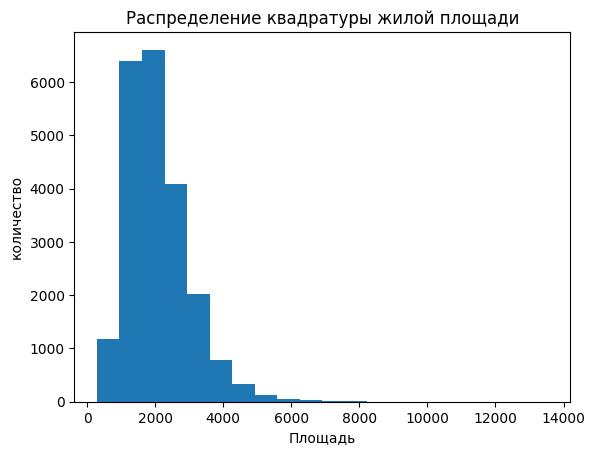

In [148]:
plt.hist(df['sqft_living'],bins=20)
plt.xlabel('Площадь')
plt.ylabel('количество')
plt.title('Распределение квадратуры жилой площади')

##### 1.4 Изучите распределение года постройки

Text(0.5, 1.0, 'Распределение по годам постройки')

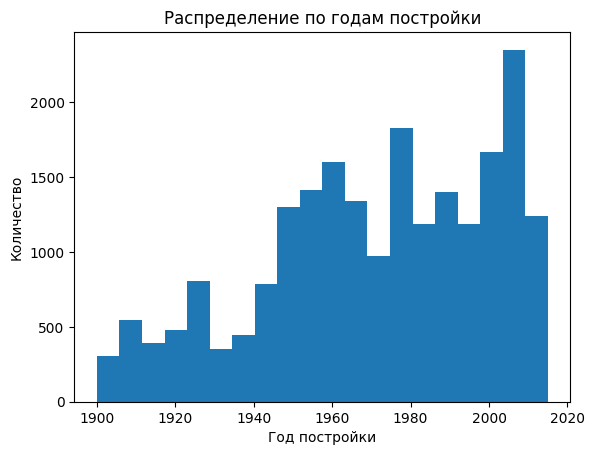

In [149]:
plt.hist(df['yr_built'],bins=20)
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Распределение по годам постройки')

### Условие 2: 2 задача
##### 2.1 Изучите распределение домов от наличия вида на набережную

In [166]:
data = df['waterfront'].value_counts()
data

0    21450
1      163
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'Распределние домов от наличия вида на набережную')

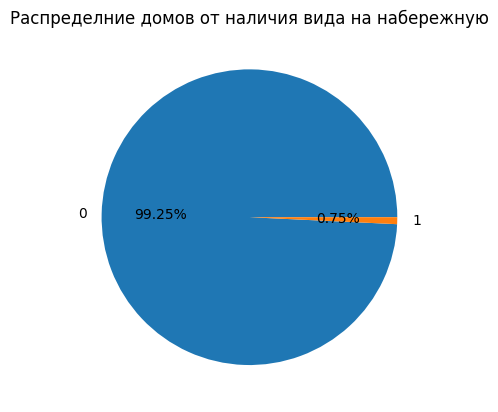

In [167]:

plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.title('Распределние домов от наличия вида на набережную')

Подавляющее большинство домов - без вида на набережную.

##### 2.2 Изучите распределение этажей домов

In [169]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Text(0.5, 1.0, 'Распределение по этажности')

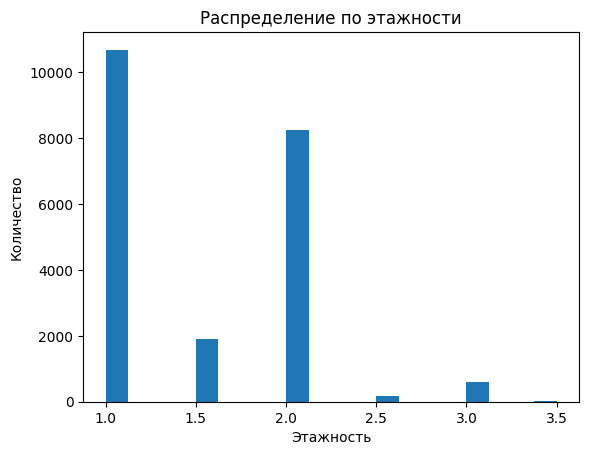

In [170]:
plt.hist(df['floors'],bins=20)
plt.xlabel('Этажность')
plt.ylabel('Количество')
plt.title('Распределение по этажности')

Большая часть домов имеет один этаж, на втором месте - двухэтажные дома.

##### 2.2 Изучите распределение состояния домов

Text(0.5, 1.0, 'Распределение по состоянию')

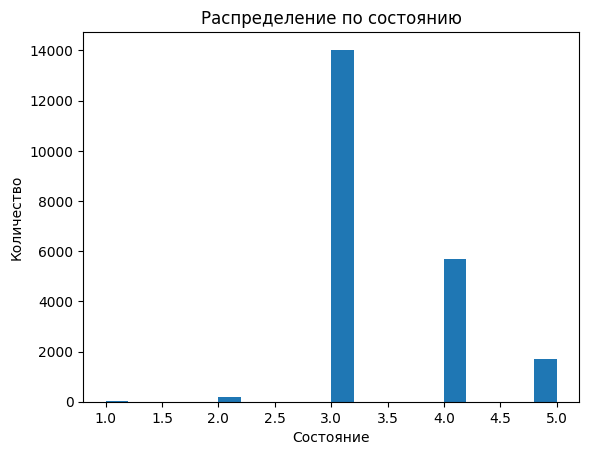

In [171]:
plt.hist(df['condition'],bins=20)
plt.xlabel('Состояние')
plt.ylabel('Количество')
plt.title('Распределение по состоянию')

### Условие 3: 3 задача
##### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока. Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Text(0.5, 1.0, 'Средняя цена от этажности')

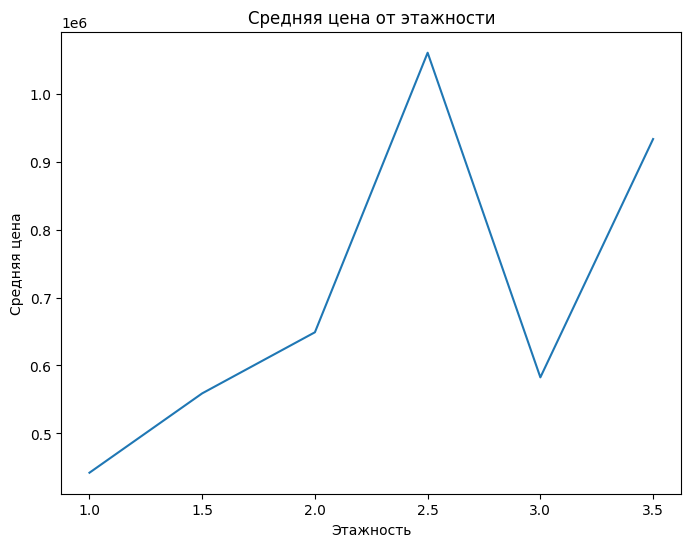

In [175]:
plt.figure(figsize=(8,6))
data = df.groupby('floors').agg({'price':['mean']})
plt.plot(data['price'])
plt.xlabel('Этажность')
plt.ylabel('Средняя цена')
plt.title('Средняя цена от этажности')

In [236]:
plt.figure(figsize=(8,6))
data = df.groupby('waterfront').agg({'price':['mean']})
data

,price
,mean
waterfront,
0,5.315636e+05
1,1.661876e+06


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Средняя цена от вида на набережную')

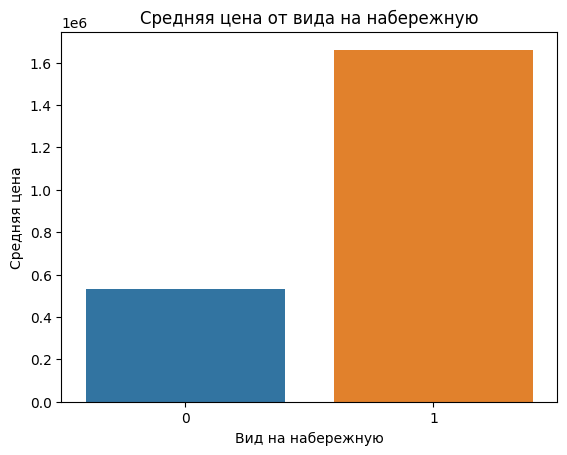

In [233]:
sns.barplot([data.iloc[0], data.iloc[1]])
plt.xlabel('Вид на набережную')
plt.ylabel('Средняя цена')
plt.title('Средняя цена от вида на набережную')

Средняя цена гораздо выше у домов с видом на набережную.

Text(0.5, 1.0, 'Взаимосвязь стоимости дома и вида на набережную')

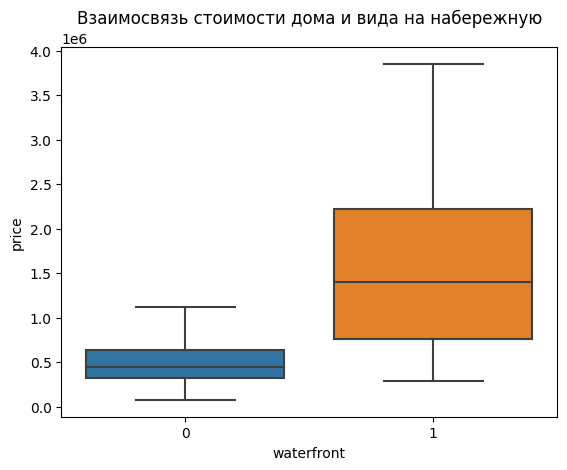

In [246]:
sns.boxplot(x=df['waterfront'], y=df['price'],showfliers=False)
plt.title('Взаимосвязь стоимости дома и вида на набережную')

In [245]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix,2)
corr_matrix

C:\Users\user\AppData\Local\Temp\ipykernel_12668\1590806176.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


<AxesSubplot: >

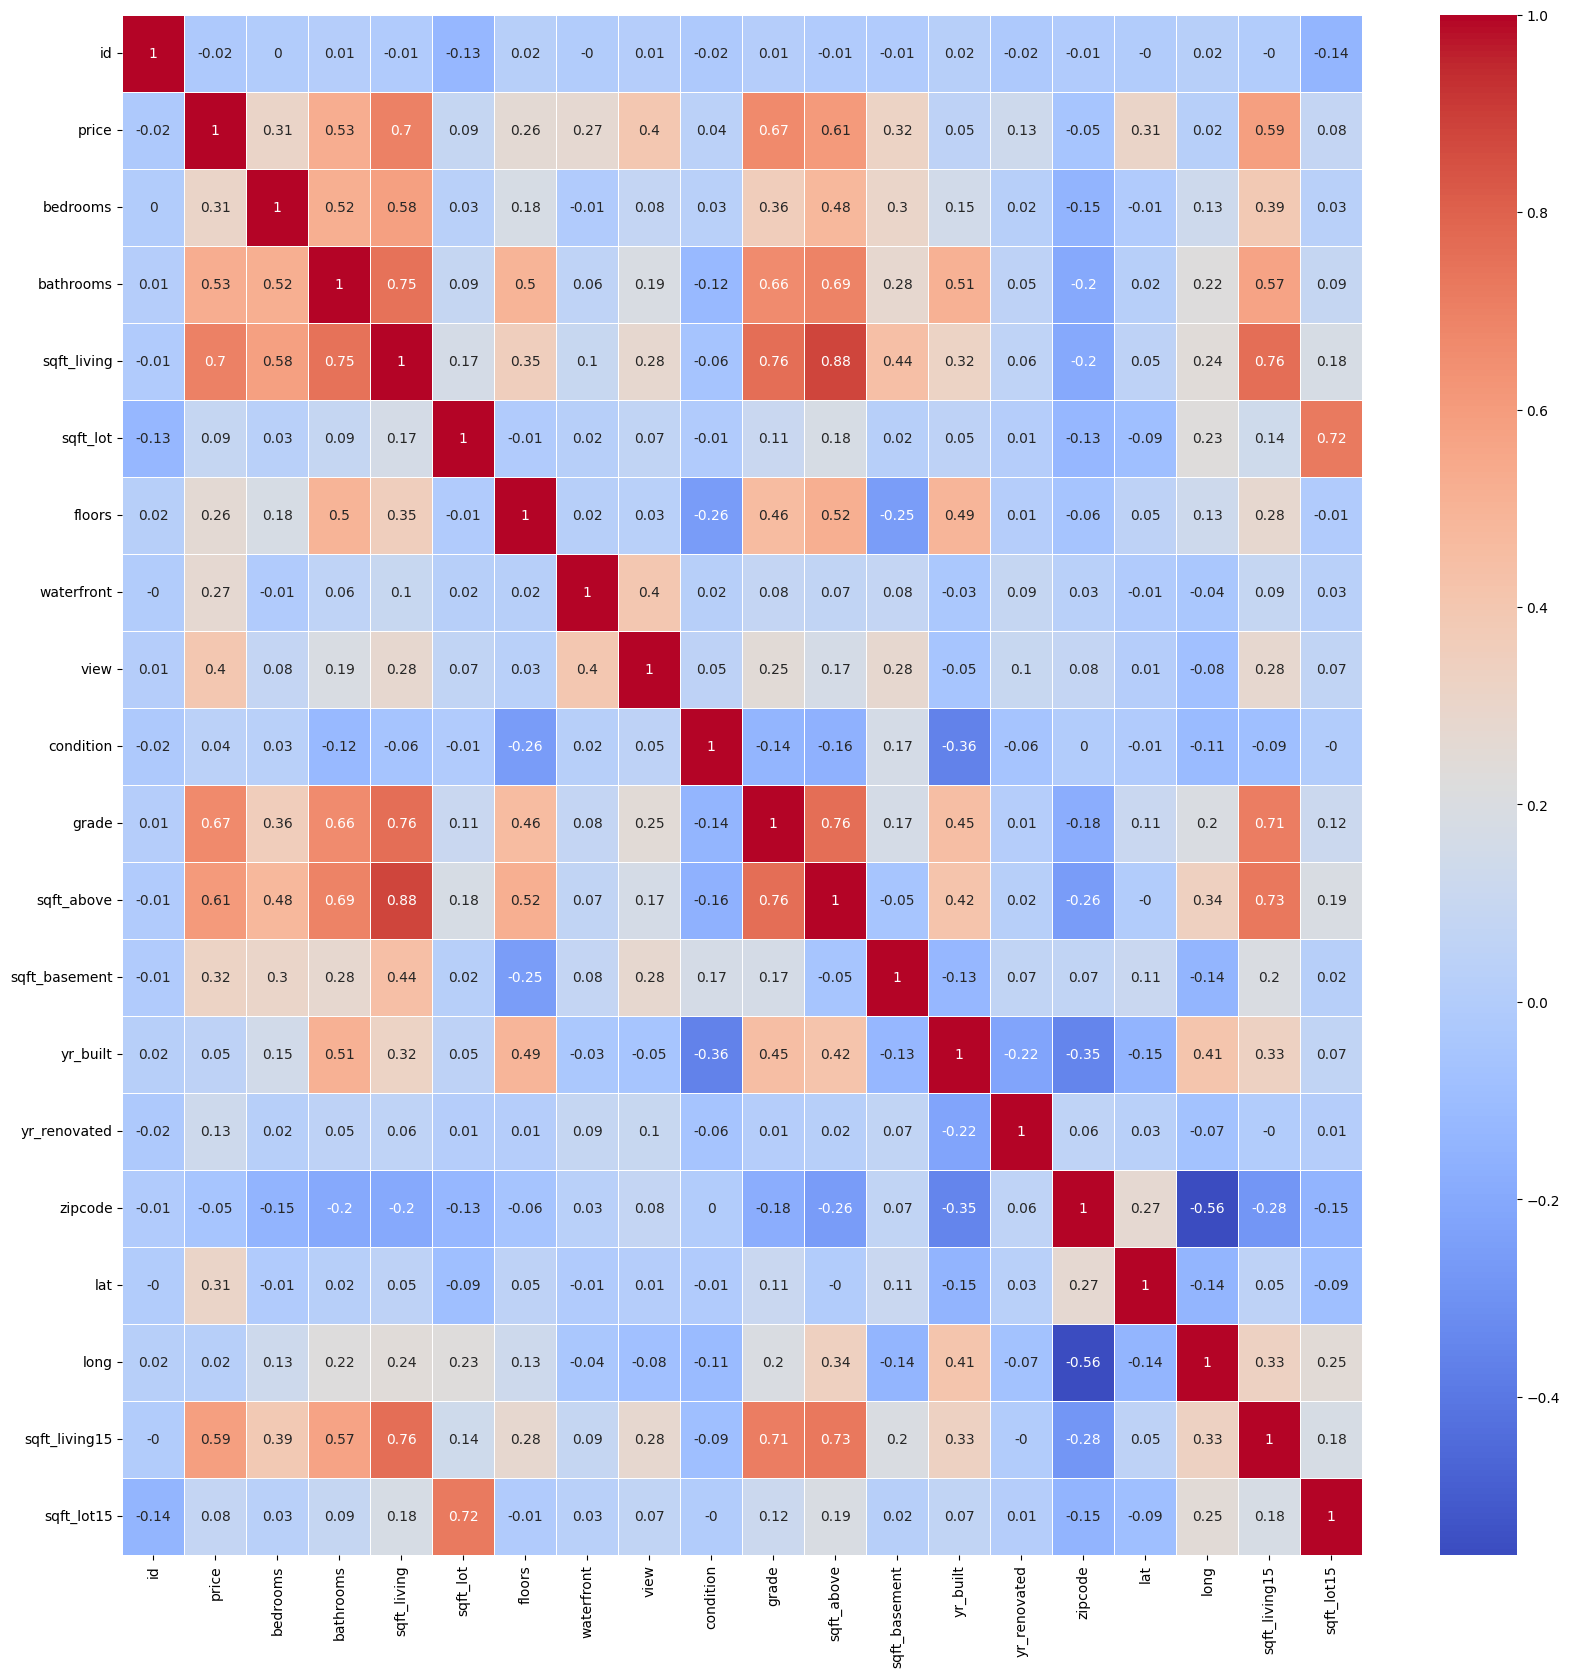

In [244]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True, linewidth=0.5, cmap='coolwarm')

Жилая площадь и класс жилья также значительно влияет на цену.

Text(0.5, 1.0, 'Распределение цен домов от класса')

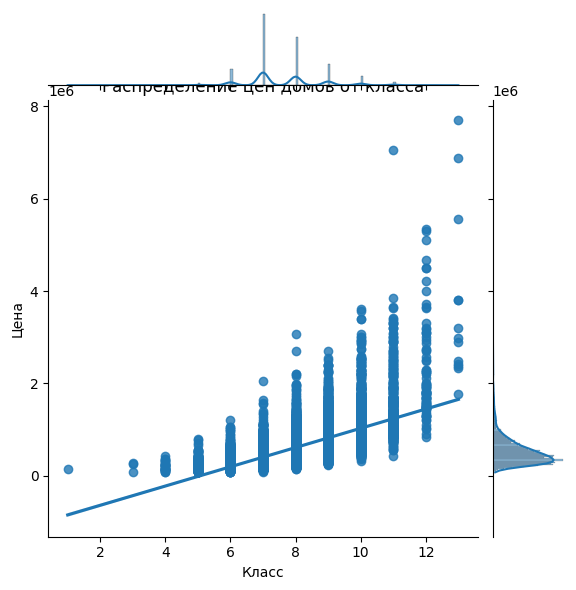

In [268]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg')
plt.xlabel('Класс')
plt.ylabel('Цена')
plt.title('Распределение цен домов от класса')

Из графика видно, что цена возрастает с уровнем класса дома.

Text(0.5, 1.0, 'Распределение цен домов от этажности')

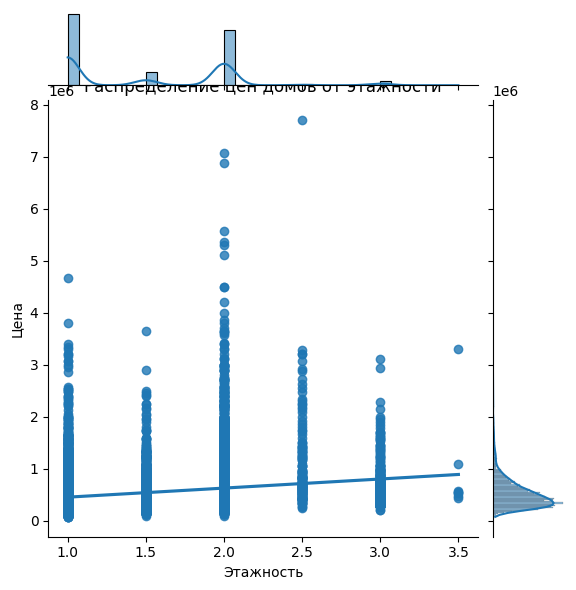

In [269]:
sns.jointplot(x=df['floors'], y=df['price'], kind='reg')
plt.xlabel('Этажность')
plt.ylabel('Цена')
plt.title('Распределение цен домов от этажности')

Как видно, зависимость цены от этажности несильно выражена.

Text(0.5, 1.0, 'Распределение цен домов от площади')

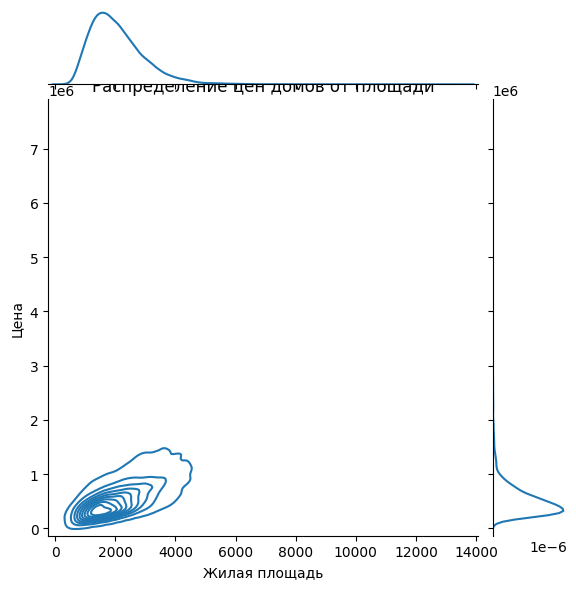

In [272]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='kde')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.title('Распределение цен домов от площади')

В целом, видим, что цена растет с увеличением площади.